**Aikins Acheampong**

Fall 2024

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [186]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a. Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [187]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3
# print(test_A)
# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1   1   1]
 [  2   4   8]
 [  3   9  27]
 [  4  16  64]
 [  5  25 125]
 [  6  36 216]
 [  7  49 343]
 [  8  64 512]
 [  9  81 729]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b. Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c. Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean squared error.

The plot created by running the below cell should "look right" to you.

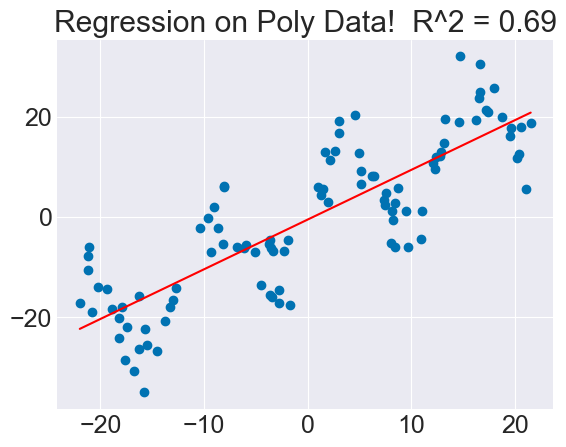

In [188]:
poly_data = data.Data('data/poly_data.csv')
poly_reg = linear_regression.LinearRegression(poly_data)
poly_reg.poly_regression('X', 'Y', 1)

poly_reg.scatter('X', 'Y', 'Regression on Poly Data!')



In [189]:
print(f"p = 1; MSE: {poly_reg.compute_mse():.2f}")

p = 1; MSE: 71.81


#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

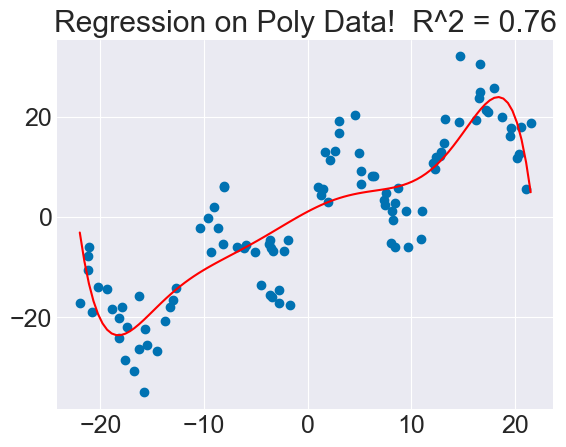

In [190]:
poly_reg.poly_regression('X', 'Y', 7)

poly_reg.scatter('X', 'Y', 'Regression on Poly Data!')

In [191]:
print(f"p = 7; MSE: {poly_reg.compute_mse():.2f}")

p = 7; MSE: 55.03


### 3d. Questions

**Question 5:** Describe the `p=7` fit compared to `p=1` — is it better or worse? Why?

**Question 6:** Describe what happens visually to the shape of the regression curve and in relation to the data as you experiment with the polynomial degree between 1 and 7. 

**Question 7:** Create and interpret a plot showing the MSE values as the polynomial degree goes from 1 to 7.

**Answer 5:** The p=7 fit is better than the p=1 fit. This is because p=7 has a lower MSE than the MSE for p=1.

**Answer 6:** p=1 is linear and p=7 is a curve. 

**Answer 7:** The MSE values decrease from p=1 to p=7

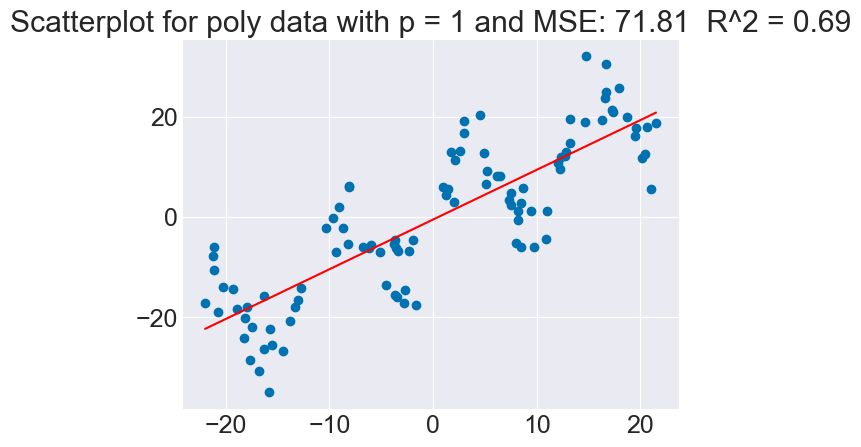

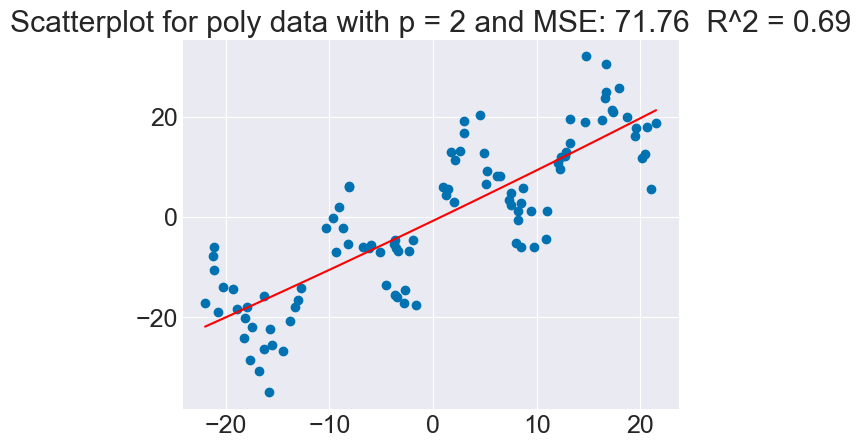

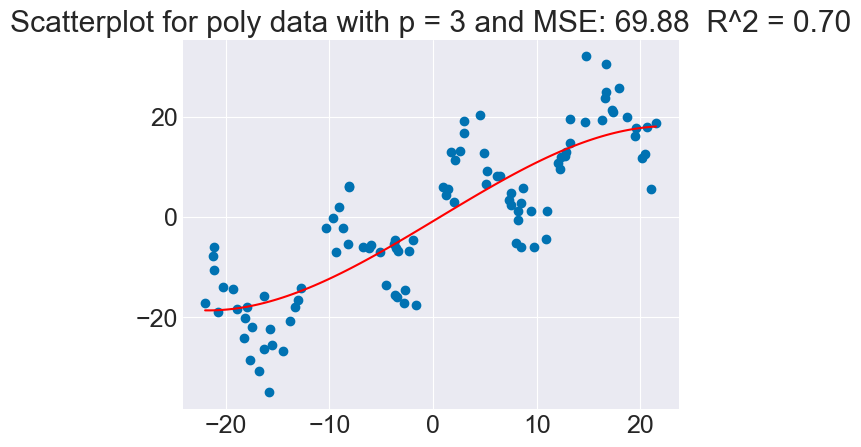

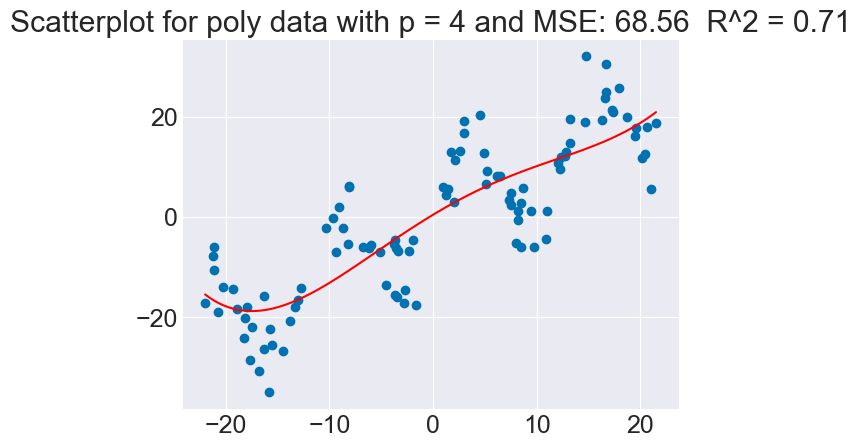

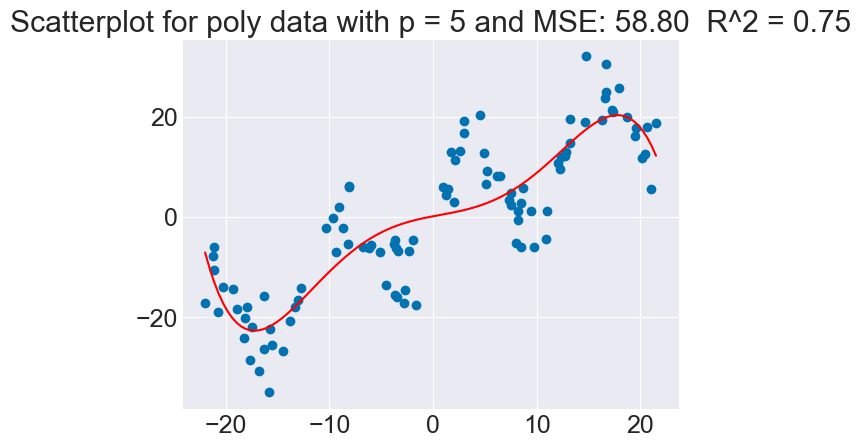

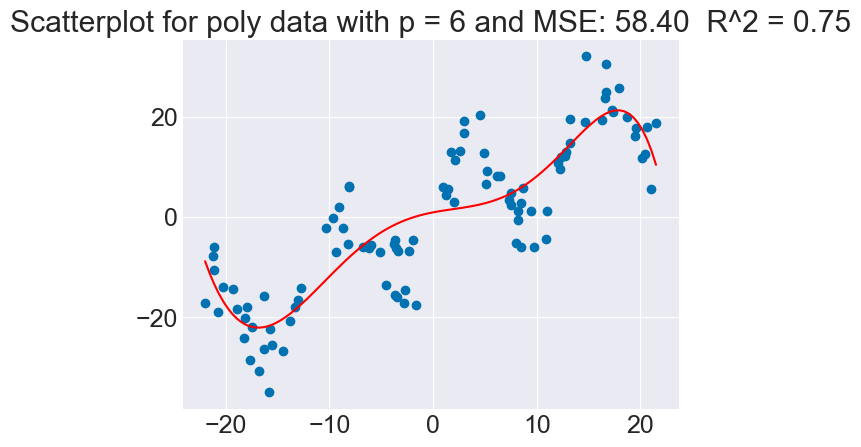

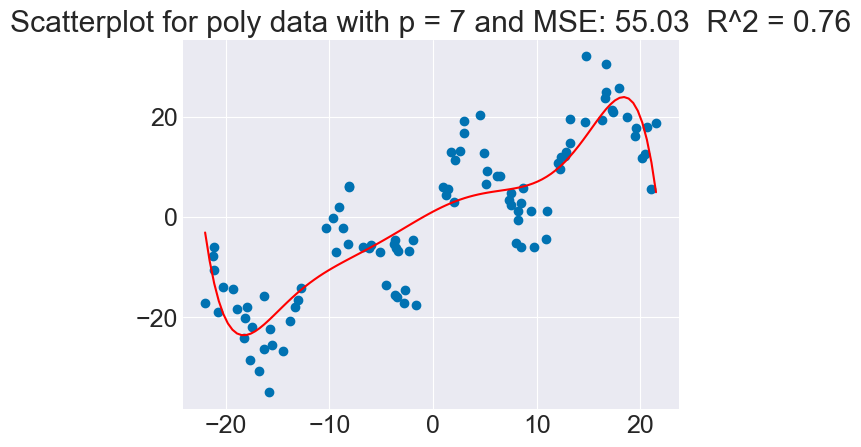

In [192]:
for i in range(1, 8):
    poly_regression = linear_regression.LinearRegression(poly_data)
    poly_regression.poly_regression("X", "Y", i)
    poly_regression.scatter("X", "Y", f"Scatterplot for poly data with p = {i} and MSE: {poly_regression.compute_mse():.2f}")
    plt.show()

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a. Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [193]:
training_set = data.Data("data/poly_data.csv")
training_set.limit_samples(0, 50)
print(training_set)

validation_set = data.Data("data/poly_data.csv")
validation_set.limit_samples(start_row=50, end_row=100)
print(validation_set)

data/poly_data.csv(50, 2)
Headers: 
	X   Y
--------------------------------------------------
Showing first 5/150 rows.
2.147   11.382
9.465   1.034
4.52   20.251
1.974   2.89
-3.358   -6.809

data/poly_data.csv(50, 2)
Headers: 
	X   Y
--------------------------------------------------
Showing first 5/150 rows.
-3.65   -4.658
9.69   -6.107
-21.986   -17.271
-8.694   -2.22
-15.536   -25.608



Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b. Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

In [194]:
def statistics(linreg, set_type: str = 'Fit'):
    return f"R2 ({set_type}): {linreg.R2}\nMSE ({set_type}): {linreg.mse}"


R2 (Fit): 0.6600388084752988
MSE (Fit): 59.59921097570393
R2 (Validation): 0.6863898169307059
MSE (Validation): 88.58467771864787


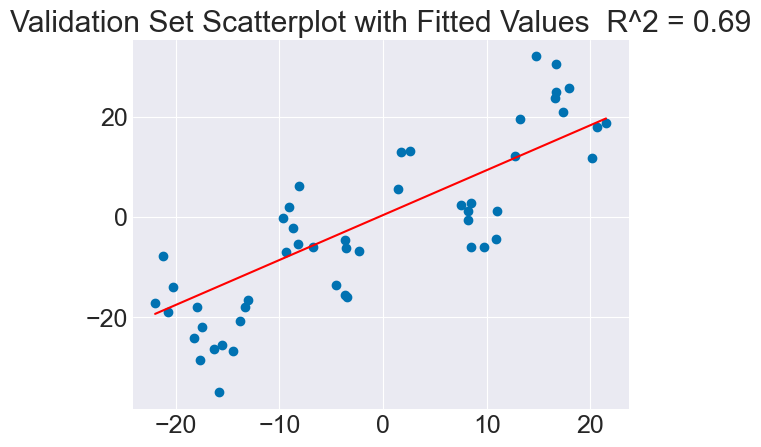

In [195]:

fit_poly_reg = linear_regression.LinearRegression(training_set)
fit_poly_reg.poly_regression('X', 'Y', 1)

val_poly_reg = linear_regression.LinearRegression(validation_set)


val_poly_reg.initialize(
    ind_vars='X', 
    dep_var='Y', 
    slope=fit_poly_reg.get_fitted_slope(), 
    intercept=fit_poly_reg.get_fitted_intercept(), 
    p=fit_poly_reg.p
)

val_poly_reg.scatter('X', 'Y', "Validation Set Scatterplot with Fitted Values")


print(statistics(fit_poly_reg, "Fit"))
print(statistics(val_poly_reg, "Validation"))


R2 (Fit): 0.7815173867606515
MSE (Fit): 38.30258184051851
R2 (Validation): 0.6585136986425677
MSE (Validation): 96.45877456854515


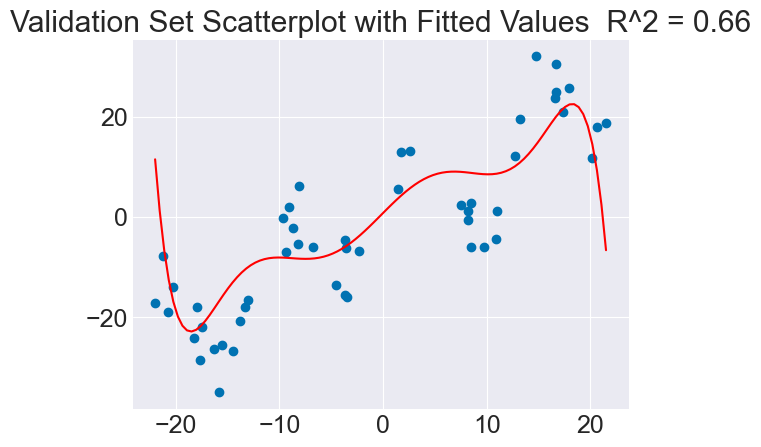

In [196]:
fit_poly_reg = linear_regression.LinearRegression(training_set)
fit_poly_reg.poly_regression('X', 'Y', 7)

val_poly_reg = linear_regression.LinearRegression(validation_set)


val_poly_reg.initialize(
    ind_vars='X', 
    dep_var='Y', 
    slope=fit_poly_reg.get_fitted_slope(), 
    intercept=fit_poly_reg.get_fitted_intercept(), 
    p=fit_poly_reg.p
)

val_poly_reg.scatter('X', 'Y', "Validation Set Scatterplot with Fitted Values")


print(statistics(fit_poly_reg, "Fit"))
print(statistics(val_poly_reg, "Validation"))

### 4c. Questions

**Question 8:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 9:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSE, $R^2$).

**Question 10:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 11:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSE, $R^2$).

**Answer 8:** Based on the R² and MSE values, the model does not generalize as well to the validation set. The drop in R² (from 0.78 to 0.66) and the increase in MSE (from 38.30 to 96.46) show that the model performs poorly on the validation set compared to the training set.
Why? This is due to overfitting.

**Answer 9:** 
Both MSE and R² difference reduce, therefore the generalization

**Answer 10:** it's likely that higher polynomial degrees (like 9 and 10) might generalize better, since they have very high R² values.

**Answer 11:** The R² values increase from 7 to 10 and starts to decrese. Similarly, the MSE also behaves the same.

## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **generative AI (e.g. ChatGPT, Copilot, etc.) is strongly discouraged.** If you do use it, you should use it either at the micro scale (e.g. to better understand syntax of a particular command) or at the outline level (e.g. to get a basic idea).

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

Slope: [[-0.95005]]
Intercept: 34.5538408793831
R-squared: 0.5441462975864797
Mean Squared Error: 38.48296722989415
Predictions: [[29.8226 ]
 [25.87039]
 [30.72514]
 [31.7607 ]
 [29.49008]
 [29.60408]
 [22.74473]
 [16.3604 ]
 [ 6.11886]
 [18.308  ]
 [15.12533]
 [21.94669]
 [19.62857]
 [26.70643]
 [24.80633]
 [26.50692]
 [28.30252]
 [20.61662]
 [23.44776]
 [23.83728]
 [14.5838 ]
 [21.41466]
 [16.76892]
 [15.66686]
 [19.06804]
 [18.86853]
 [20.48361]
 [18.13699]
 [22.39321]
 [23.17225]
 [13.08273]
 [22.1652 ]
 [ 8.22797]
 [17.12044]
 [15.22984]
 [25.35736]
 [23.71378]
 [26.22191]
 [24.92984]
 [30.44963]
 [32.67274]
 [29.9556 ]
 [29.03405]
 [27.48547]
 [25.48087]
 [24.85384]
 [21.11064]
 [16.69291]
 [ 5.28282]
 [19.16304]
 [21.77568]
 [25.59488]
 [29.53758]
 [26.54492]
 [20.49311]
 [29.9841 ]
 [29.07206]
 [30.80115]
 [28.0365 ]
 [25.79439]
 [22.06069]
 [20.83513]
 [28.16001]
 [25.52837]
 [26.90594]
 [30.11711]
 [24.82534]
 [26.85844]
 [22.11769]
 [26.20291]
 [28.16951]
 [25.16735]
 [29.30

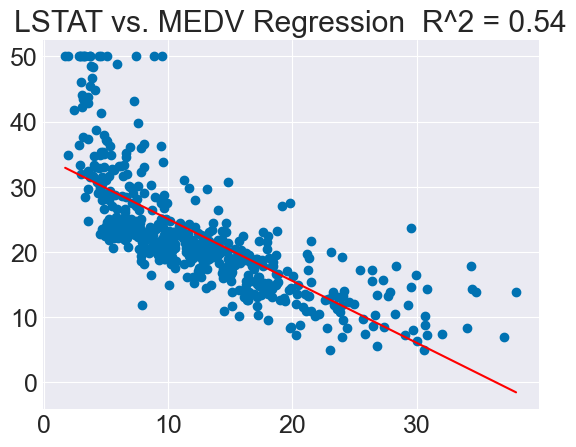

In [197]:
import analysis
from linear_regression import LinearRegression

data = analysis.Data('data/BostonHousing.csv')


lin_reg = LinearRegression(data)


lin_reg.linear_regression(['lstat'], 'medv')

print(f"Slope: {lin_reg.get_fitted_slope()}")
print(f"Intercept: {lin_reg.get_fitted_intercept()}")
print(f"R-squared: {lin_reg.R2}")
print(f"Mean Squared Error: {lin_reg.mse}")

predictions = lin_reg.predict()
print("Predictions:", predictions)


lin_reg.scatter('lstat', 'medv', "LSTAT vs. MEDV Regression")





**Hypothesis:** Higher percentage of lower status population (LSTAT) is negatively correlated with median house value (MEDV).
  
The plot shows the actual vs. predicted MEDV values, where higher LSTAT values generally correspond to lower predicted home values. this supports the hypothesis of a negative correlation between LSTAT and MEDV.

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`). [This website](https://real-statistics.com/regression/confidence-and-prediction-intervals/) should be a helpful reference.

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

In [167]:

from data import Data

train_set = Data('data/BostonHousing.csv')
train_set.limit_samples(0, 250)

test_set = Data('data/BostonHousing.csv')
test_set.limit_samples(start_row=250, end_row=500)

fit_poly_reg = linear_regression.LinearRegression(train_set)




R2 (Fit): 0.5070426770209333
MSE (Fit): 34.49257093080067
R2 (Validation): 0.5483562002843334
MSE (Validation): 42.63308629222904


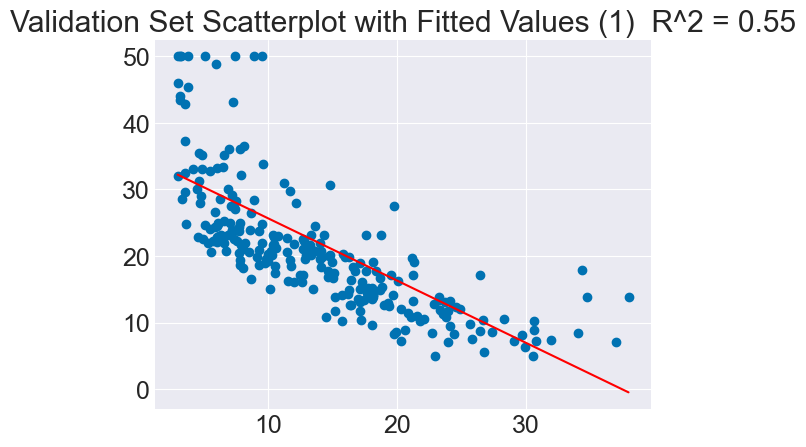

R2 (Fit): 0.6725956230509907
MSE (Fit): 22.908714747803547
R2 (Validation): 0.5398846169646251
MSE (Validation): 43.432764585008236


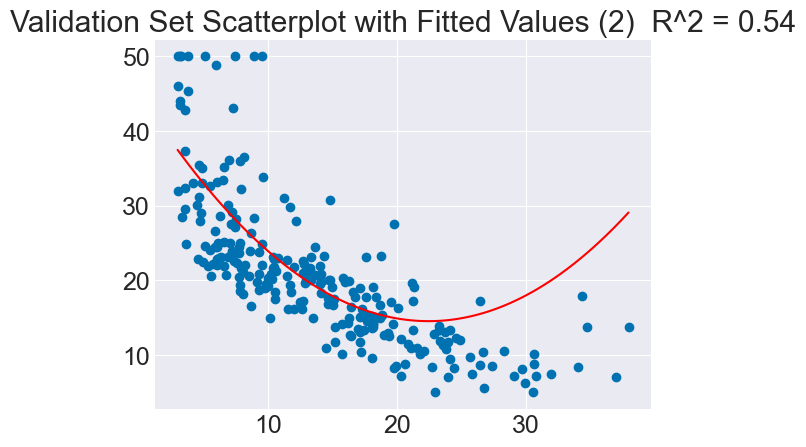

R2 (Fit): 0.7170033127766247
MSE (Fit): 19.80147743468738
R2 (Validation): 0.5425886804640232
MSE (Validation): 43.17751349425467


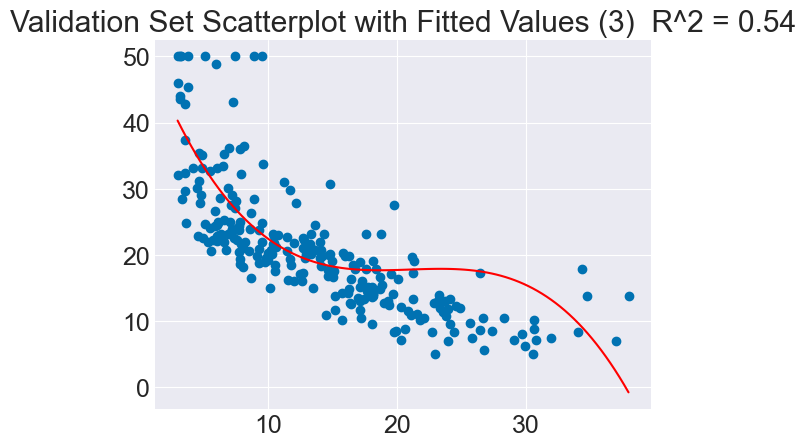

R2 (Fit): 0.7305466260057343
MSE (Fit): 18.853842273554065
R2 (Validation): 0.5575357662172808
MSE (Validation): 41.76657771447167


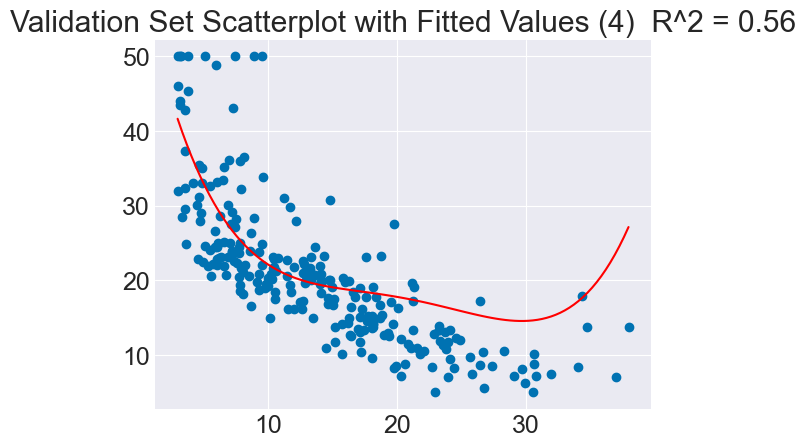

R2 (Fit): 0.7343643704879788
MSE (Fit): 18.5867120044393
R2 (Validation): 0.586034600329675
MSE (Validation): 39.076419552870604


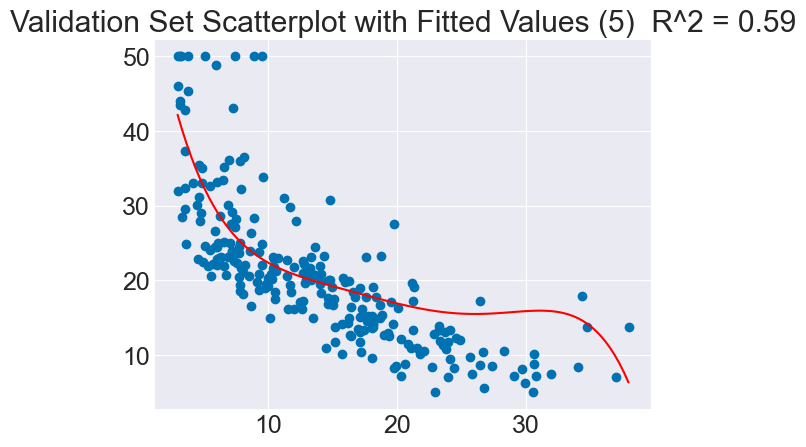

R2 (Fit): 0.7347730936809946
MSE (Fit): 18.55811335488285
R2 (Validation): 0.5687942572805713
MSE (Validation): 40.703828217359735


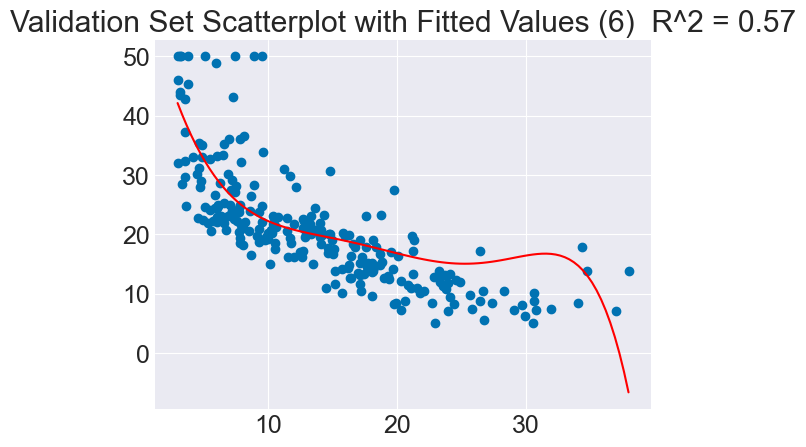

R2 (Fit): 0.7371064724706602
MSE (Fit): 18.394845198271288
R2 (Validation): 0.44733531407065397
MSE (Validation): 52.168990830222526


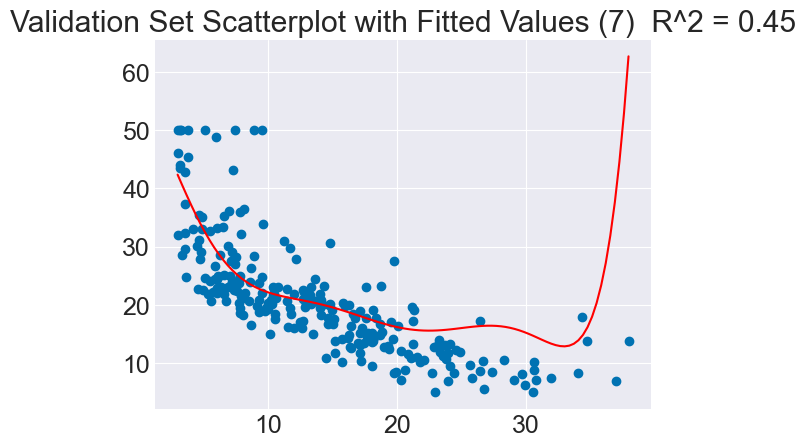

In [177]:
for i in range(1, 8):

    fit_poly_reg.poly_regression(['lstat'], 'medv', i)

    

    val_poly_reg = linear_regression.LinearRegression(test_set)
    val_poly_reg.initialize(
        ind_vars=['lstat'],
        dep_var='medv',
        slope=fit_poly_reg.get_fitted_slope(),
        intercept=fit_poly_reg.get_fitted_intercept(),
        p=fit_poly_reg.p  
    )

    val_poly_reg.scatter('lstat', 'medv', f"Validation Set Scatterplot with Fitted Values ({i})")
    print(statistics(fit_poly_reg, "Fit"))
    print(statistics(val_poly_reg, "Validation"))
    
    plt.show()

### What Degree Works Well?
the model works well from the range of 1 to 5. Beyond that, where the model becomes too complex and starts to capture noise, overfitting starts to occur.


### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.